In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

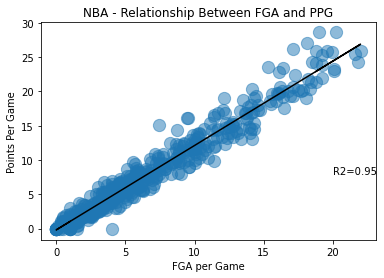

<Figure size 720x576 with 0 Axes>

In [2]:
# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()

# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     

""" Build and fit linea regression model """
# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,8, f'R2={r2}')                                   # 10, 25 are the coordinates for our text. Adjust accordingly
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
print('')

In [3]:
import heapq
import random

# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were BEST outperforming our line of regression

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 largest PPG - ExPPG in the NBA (most efficient players) and storing
# Them to player_index
player_index = heapq.nlargest(11, range(len(score)), score.take)

# A new list to store information from the original DataFrame
most_efficient = []

# Using our original DataFrame, appending all player information for my 10 most efficient players to my
# 'most_efficient' list
for i in range(len(player_index)):
    most_efficient.append(df.loc[player_index[i]])

# Creating a new DataFrame called 'most_efficient_DF' from my 'most_efficient' list
most_efficient_DF = pd.DataFrame(most_efficient)

# Creating a filter for at least 500 shot attempts
most_efficient_DF = most_efficient_DF[most_efficient_DF['FGA'] > 500]

# Resetting player_index list so that it only contains those with at least 500 shot attempts
player_index = most_efficient_DF.index

Explanation

In [4]:
most_efficient_df = pd.DataFrame(most_efficient)
most_efficient_df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
56,203497,57,Rudy Gobert,UTA,21,660,114,156,0.731,0,1,0.000,90,135,0.667,61,244,305,20,20,45,40,54,318,581,0.50,0.50
3,201142,4,Kevin Durant,BKN,19,676,198,361,0.548,37,90,0.411,111,130,0.854,9,136,145,102,14,12,58,24,544,577,1.76,0.24
28,203999,29,Nikola Jokic,DEN,15,486,153,257,0.595,26,63,0.413,61,81,0.753,41,164,205,96,18,13,46,43,393,555,2.09,0.39
25,202710,26,Jimmy Butler,MIA,17,582,135,260,0.519,6,30,0.200,125,147,0.850,27,72,99,90,36,5,33,29,401,451,2.73,1.09
6,203507,7,Giannis Antetokounmpo,MIL,20,648,191,363,0.526,23,83,0.277,135,201,0.672,36,200,236,117,22,36,61,57,540,652,1.92,0.36
49,1626149,50,Montrezl Harrell,WAS,21,566,127,198,0.641,2,7,0.286,83,107,0.776,58,116,174,48,12,15,25,39,339,468,1.92,0.48
67,1628386,67,Jarrett Allen,CLE,18,598,120,172,0.698,1,4,0.250,50,79,0.633,62,142,204,34,17,17,36,31,291,446,0.94,0.47
40,203084,41,Harrison Barnes,SAC,19,665,110,230,0.478,37,93,0.398,104,123,0.846,26,110,136,46,19,3,39,27,361,387,1.18,0.49
5,201939,4,Stephen Curry,GSW,19,650,179,384,0.466,105,248,0.423,81,86,0.942,10,100,110,130,35,10,62,36,544,557,2.10,0.56
91,1626158,92,Richaun Holmes,SAC,18,493,109,157,0.694,2,4,0.500,40,47,0.851,50,127,177,21,6,18,29,57,260,398,0.72,0.21


In [5]:
# Creating a filter for at least 500 shot attempts
#most_efficient_df = most_efficient_DF[most_efficient_DF['FGA'] > 200]

# Resetting player_index list so that it only contains those with at least 500 shot attempts
player_index = most_efficient_df.index

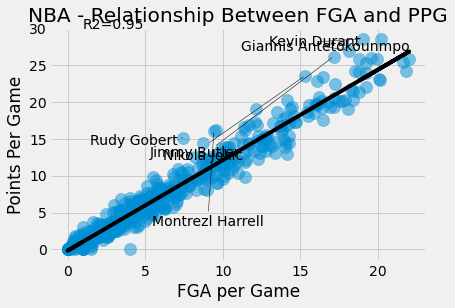

<Figure size 720x576 with 0 Axes>

In [6]:
x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(1,30, f'R2={r2}')                                   # 10, 25 are the coordinates for our text. Adjust accordingly


for i in range(len(player_index) - 5):
    plt.annotate(most_efficient_df.PLAYER[player_index[i]], 
                 (x[player_index[i]], y[player_index[i]]), 
                 (x[player_index[i]]-random.randint(0,11), y[player_index[i]]-random.randint(0,14)),
                 arrowprops=dict(arrowstyle='-', color = 'black'))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
print(' ')

In [7]:
most_efficient_df['PPG - ExPPG'] = score[player_index]
most_efficient_df.loc[:,'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG - ExPPG
56,Rudy Gobert,UTA,21,660,114,156,0.731,0,1,0.000,90,135,0.667,61,244,305,20,20,45,40,54,318,581,0.50,0.50,6.189687
3,Kevin Durant,BKN,19,676,198,361,0.548,37,90,0.411,111,130,0.854,9,136,145,102,14,12,58,24,544,577,1.76,0.24,5.437574
28,Nikola Jokic,DEN,15,486,153,257,0.595,26,63,0.413,61,81,0.753,41,164,205,96,18,13,46,43,393,555,2.09,0.39,5.303282
25,Jimmy Butler,MIA,17,582,135,260,0.519,6,30,0.200,125,147,0.850,27,72,99,90,36,5,33,29,401,451,2.73,1.09,4.955020
6,Giannis Antetokounmpo,MIL,20,648,191,363,0.526,23,83,0.277,135,201,0.672,36,200,236,117,22,36,61,57,540,652,1.92,0.36,4.852081
49,Montrezl Harrell,WAS,21,566,127,198,0.641,2,7,0.286,83,107,0.776,58,116,174,48,12,15,25,39,339,468,1.92,0.48,4.728308
67,Jarrett Allen,CLE,18,598,120,172,0.698,1,4,0.250,50,79,0.633,62,142,204,34,17,17,36,31,291,446,0.94,0.47,4.595839
40,Harrison Barnes,SAC,19,665,110,230,0.478,37,93,0.398,104,123,0.846,26,110,136,46,19,3,39,27,361,387,1.18,0.49,4.291274
5,Stephen Curry,GSW,19,650,179,384,0.466,105,248,0.423,81,86,0.942,10,100,110,130,35,10,62,36,544,557,2.10,0.56,3.947792
91,Richaun Holmes,SAC,18,493,109,157,0.694,2,4,0.500,40,47,0.851,50,127,177,21,6,18,29,57,260,398,0.72,0.21,3.899192


Least Efficient Shooters

In [20]:
# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were least outperforming our line of regression while taking 500 shots

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 smallest PPG - ExPPG in the NBA (least efficient players) and storing
# Them to player_index
player_index2 = heapq.nsmallest(20, range(len(score)), score.take)

# A new list to store information from the original DataFrame
least_efficient = []

# Using our original DataFrame, appending all player information for my 10 least efficient players to my
# 'least_efficient' list
for i in range(len(player_index2)):
    least_efficient.append(df.loc[player_index2[i]])

# Creating a new DataFrame called 'least_efficient_DF' from my 'least_effecient' list
least_efficient_df = pd.DataFrame(least_efficient)

# Creating a filter for at least 500 shot attempts
least_efficient_df = least_efficient_df[least_efficient_df['FGA'] > 200]

# Resetting player_index2 list so that it only contains those with at least 500 shot attempts
player_index2 = least_efficient_df.index

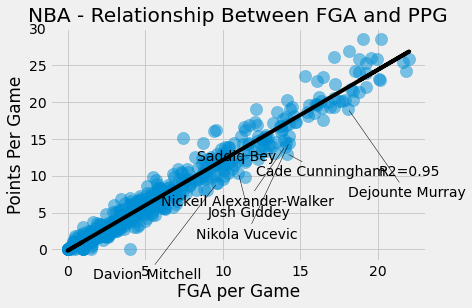

<Figure size 720x576 with 0 Axes>

In [21]:
x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,10, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly


'''
---------------------------------------------------------------------------------------------
MY CODE BELOW
'''

# In order to point out my 10 least efficient players on the graph, I used plt.annotate and plugged in the
# indexes from 'player_index2' list with lines drawn to their dots
for i in range(len(player_index2) - 4):
    plt.annotate(least_efficient_df.PLAYER[player_index2[i]], 
                 (x[player_index2[i]], y[player_index2[i]]), 
                 (x[player_index2[i]]-random.randint(0,10), y[player_index2[i]]-random.randint(0,14)),
                 arrowprops=dict(arrowstyle='-', color = 'black'))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
print(' ')

In [10]:
# Below is a printed out DataFrame of the ten least efficient scorers in the NBA (with at least 500 shot attempts), and on the far right you can see exactly how much they fall short of their expected points per game.

least_efficient_df['ExPPG - PPG'] = score[player_index2]
least_efficient_df.loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,ExPPG - PPG
89,Saddiq Bey,DET,20,650,97,267,0.363,37,126,0.294,30,41,0.732,43,86,129,49,21,4,28,35,261,255,1.75,0.75,-3.190610
54,Nickeil Alexander-Walker,NOP,23,667,118,322,0.366,47,158,0.297,38,48,0.792,27,70,97,59,23,10,33,41,321,263,1.79,0.70,-3.084036
39,Dejounte Murray,SAS,19,660,153,343,0.446,22,72,0.306,35,50,0.700,16,145,161,153,38,9,44,37,363,475,3.48,0.86,-2.922826
93,Jalen Suggs,ORL,21,583,87,257,0.339,26,102,0.255,58,76,0.763,16,55,71,75,24,9,67,58,258,182,1.12,0.36,-2.586486
35,Reggie Jackson,LAC,21,706,139,346,0.402,62,181,0.343,29,36,0.806,12,63,75,78,15,2,41,36,369,284,1.90,0.37,-2.516551
7,Jayson Tatum,BOS,21,769,181,458,0.395,56,177,0.316,92,115,0.800,25,154,179,78,20,17,56,55,510,448,1.39,0.36,-2.365942


In [11]:
# This is a section on the most underutilized players and most overutilized players in the NBA - based on how they performed against the line of regression.

df['Shots per Game'] = df['FGA'] / df['GP']

x = df.nlargest(100, ['PTS'])


In [12]:
print(round(x['Shots per Game'].mean(), 2), 'average shots per game for the top 100 scorers in the NBA.')

14.51 average shots per game for the top 100 scorers in the NBA.


In [13]:
df['Score'] =  score
df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,Shots per Game,Score
0,201942,1,DeMar DeRozan,CHI,22,770,202,413,0.489,19,58,0.328,147,164,0.896,15,100,115,92,21,8,45,48,570,533,2.04,0.47,18.772727,2.994788
1,203897,2,Zach LaVine,CHI,22,764,206,423,0.487,63,164,0.384,82,95,0.863,8,106,114,82,11,7,58,33,557,483,1.41,0.19,19.227273,1.844474
2,1629027,3,Trae Young,ATL,21,709,191,411,0.465,56,142,0.394,107,120,0.892,12,64,76,190,18,2,80,35,545,518,2.38,0.23,19.571429,2.055125
3,201142,4,Kevin Durant,BKN,19,676,198,361,0.548,37,90,0.411,111,130,0.854,9,136,145,102,14,12,58,24,544,577,1.76,0.24,19.000000,5.437574
4,202331,4,Paul George,LAC,21,745,199,462,0.431,61,184,0.332,85,95,0.895,9,144,153,107,37,9,90,55,544,487,1.19,0.41,22.000000,-0.981312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1626155,449,Sam Dekker,TOR,1,1,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000,0.189094
466,1630573,449,Sam Hauser,BOS,2,5,0,2,0.000,0,2,0.000,0,0,0.000,0,1,1,0,1,0,0,1,0,0,0.00,0.00,1.000000,-1.041596
467,1630176,449,Vernon Carey Jr.,CHA,1,1,0,1,0.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,0,0,0,0,0.00,0.00,1.000000,-1.041596
468,1627782,449,Wayne Selden,NYK,1,1,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000,0.189094


In [14]:

var1 = df['Score'] > 2
var2 = df['Shots per Game'] <= 14
var3 = df['FGA'] >= 200
df[var1 & var2 & var3].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,Shots per Game,Score
26,Domantas Sabonis,IND,23,774,153,278,0.550,17,64,0.266,75,102,0.735,73,203,276,93,25,8,71,76,398,577,1.31,0.35,12.086957,2.618152
40,Harrison Barnes,SAC,19,665,110,230,0.478,37,93,0.398,104,123,0.846,26,110,136,46,19,3,39,27,361,387,1.18,0.49,12.105263,4.291274
42,Bojan Bogdanovic,UTA,21,632,118,256,0.461,50,126,0.397,69,75,0.920,17,69,86,39,9,1,34,27,355,312,1.15,0.27,12.190476,2.091166
44,John Collins,ATL,21,674,136,239,0.569,21,57,0.368,55,70,0.786,36,131,167,47,16,27,22,59,348,465,2.14,0.73,11.380952,2.754105
50,Bam Adebayo,MIA,18,592,126,243,0.519,0,1,0.000,85,112,0.759,49,134,183,57,20,6,53,59,337,406,1.07,0.38,13.500000,2.297009
60,Seth Curry,PHI,19,644,111,217,0.512,43,103,0.417,43,47,0.915,9,48,57,45,16,2,31,42,308,287,1.45,0.52,11.421053,2.343851
61,Norman Powell,POR,18,523,106,210,0.505,36,81,0.444,56,69,0.812,7,37,44,28,17,7,18,35,304,265,1.56,0.94,11.666667,2.719939


In [15]:
var1 = df['Score'] <= (-2)
var2 = df['Shots per Game'] >= 14
var3 = df['FGA'] >= 500
df[var1 & var2].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,Shots per Game,Score
7,Jayson Tatum,BOS,21,769,181,458,0.395,56,177,0.316,92,115,0.800,25,154,179,78,20,17,56,55,510,448,1.39,0.36,21.809524,-2.365942
19,CJ McCollum,POR,21,746,165,386,0.427,68,170,0.400,28,39,0.718,24,66,90,93,21,14,40,45,426,372,2.33,0.53,18.380952,-2.146436
35,Reggie Jackson,LAC,21,706,139,346,0.402,62,181,0.343,29,36,0.806,12,63,75,78,15,2,41,36,369,284,1.90,0.37,16.476190,-2.516551
39,Dejounte Murray,SAS,19,660,153,343,0.446,22,72,0.306,35,50,0.700,16,145,161,153,38,9,44,37,363,475,3.48,0.86,18.052632,-2.922826
53,Jordan Clarkson,UTA,21,527,114,300,0.380,56,187,0.299,38,46,0.826,16,51,67,45,14,5,28,33,322,231,1.61,0.50,14.285714,-2.058850
54,Nickeil Alexander-Walker,NOP,23,667,118,322,0.366,47,158,0.297,38,48,0.792,27,70,97,59,23,10,33,41,321,263,1.79,0.70,14.000000,-3.084036
121,Caris LeVert,IND,15,399,88,211,0.417,19,70,0.271,22,30,0.733,6,39,45,43,10,7,22,32,217,169,1.96,0.46,14.066667,-2.655937
123,Nikola Vucevic,CHI,15,496,90,214,0.421,21,63,0.333,16,26,0.615,26,142,168,62,16,16,25,36,217,320,2.48,0.64,14.266667,-2.902075
139,Cade Cunningham,DET,15,469,71,212,0.335,27,110,0.245,26,30,0.867,16,82,98,72,19,7,52,36,195,194,1.39,0.36,14.133333,-4.204650


One problem with this is it currently only shows data for this current season which is probably too small of a sample size.